### Create final combined dataset

As all the data are now available, the model will need a combined single dataset with all the features to train.

Initially, each dataset must be analysed to see if the features available do have an impact on the price to be predicted. If not, the features can be excluded when creating the final dataset, as it is at that point, only additional noise that has no real impact.

In [1]:
import pandas as pd

In [4]:
TRENDS_DATA = '../../data/GTrends/BTC_GTrends_total.csv'
TWEETS_DATA = '../../data/Tweets/BTC_Tweet_Sentiment_Unweighed.csv'
TWEET_VOLUME_DATA = '../../data/Tweets/BTC_Tweet_Volume.csv'
BLOCK_REWARD_DATA = '../../data/BTC_Block_Reward.csv'
BTC_PRICES_DATA = '../../data/BTC_Prices.csv'

### Analyze prices dataset

In [5]:
historical_prices = pd.read_csv(BTC_PRICES_DATA)
historical_prices.head()

,date,volume,close,open,max,min,change_percent
0,2014-01-01,10757,815.940002,805.940002,829.929993,770.969971,1.240787
1,2014-01-02,12812,856.909973,815.940002,886.210022,810.469971,5.021199
2,2014-01-03,9709,884.260010,856.909973,888.229980,839.440002,3.191705
3,2014-01-04,14239,924.690002,884.260010,932.159973,848.320007,4.572184
4,2014-01-05,21374,1014.739990,924.690002,1029.859985,911.359985,9.738397


In [6]:
closing_price = historical_prices['close']
closing_price[:10]

0     815.940002
1     856.909973
2     884.260010
3     924.690002
4    1014.739990
5    1012.650024
6     879.900024
7     938.840027
8     936.950012
9     957.760010
Name: close, dtype: float64

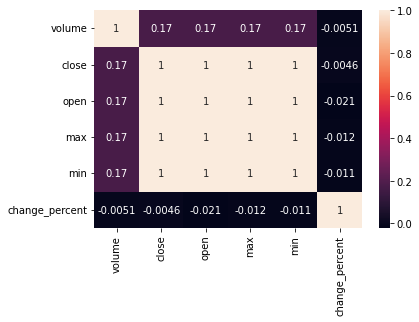

In [12]:
# Check correlation
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(historical_prices.corr(), annot=True)
plt.show()

In [13]:
# Due to the large correlation of variables and closing price: max, min, open can be dropped
historical_prices.drop(['max', 'min', 'open'], axis=1, inplace=True)
historical_prices.head()

,date,volume,close,change_percent
0,2014-01-01,10757,815.940002,1.240787
1,2014-01-02,12812,856.909973,5.021199
2,2014-01-03,9709,884.260010,3.191705
3,2014-01-04,14239,924.690002,4.572184
4,2014-01-05,21374,1014.739990,9.738397


As the `max, min, open` features are highly correlated, they are dropped. The `volume` and `change_percent` features can remain as they aren't.

### Analyze Twitter volume dataset

In [14]:
twitter_volume = pd.read_csv(TWEET_VOLUME_DATA)
twitter_volume.head()

,Unnamed: 0,Date,Tweet Volume
0,0,2014/04/09,8193.0
1,1,2014/04/10,15039.0
2,2,2014/04/11,14907.0
3,3,2014/04/12,7582.0
4,4,2014/04/13,10674.0


In [15]:
twitter_volume.drop(['Unnamed: 0'], axis=1, inplace=True)
twitter_volume.head()

,Date,Tweet Volume
0,2014/04/09,8193.0
1,2014/04/10,15039.0
2,2014/04/11,14907.0
3,2014/04/12,7582.0
4,2014/04/13,10674.0


In [16]:
twitter_volume.tail()

,Date,Tweet Volume
3206,2023/01/18,124969.0
3207,2023/01/19,114059.0
3208,2023/01/20,135671.0
3209,2023/01/21,134571.0
3210,2023/01/22,14847.0


In [17]:
historical_prices.tail()

,date,volume,close,change_percent
3304,2023-01-18,388670,20670.589844,-2.206940
3305,2023-01-19,275758,21081.183594,1.986367
3306,2023-01-20,373735,22677.236328,7.570983
3307,2023-01-21,382688,22775.677734,0.434098
3308,2023-01-22,379398,22847.929688,0.317233


In [20]:
filtered_prices = historical_prices[~(historical_prices['date'] < '2015-01-01')]

In [22]:
filtered_prices.head()

,date,volume,close,change_percent
365,2015-01-01,12820,314.890015,-1.052657
366,2015-01-02,14729,315.209991,0.101615
367,2015-01-03,47366,287.130005,-8.908343
368,2015-01-04,88769,264.720001,-7.804828
369,2015-01-05,54993,274.839996,3.822905


In [23]:
filtered_prices.tail()

,date,volume,close,change_percent
3304,2023-01-18,388670,20670.589844,-2.206940
3305,2023-01-19,275758,21081.183594,1.986367
3306,2023-01-20,373735,22677.236328,7.570983
3307,2023-01-21,382688,22775.677734,0.434098
3308,2023-01-22,379398,22847.929688,0.317233


In [25]:
filtered_t_volume = twitter_volume[~(twitter_volume['Date'] < '2015-01-01')]

In [26]:
filtered_t_volume.head()

,Date,Tweet Volume
267,2015/01/01,18681.0
268,2015/01/02,9385.0
269,2015/01/03,NaN
270,2015/01/04,7300.0
271,2015/01/05,23092.0


In [27]:
filtered_t_volume.tail()

,Date,Tweet Volume
3206,2023/01/18,124969.0
3207,2023/01/19,114059.0
3208,2023/01/20,135671.0
3209,2023/01/21,134571.0
3210,2023/01/22,14847.0


In [34]:
filtered_t_volume['close'] = list(filtered_prices['close'])

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
filtered_t_volume.head()

,Date,Tweet Volume,close
267,2015/01/01,18681.0,314.890015
268,2015/01/02,9385.0,315.209991
269,2015/01/03,NaN,287.130005
270,2015/01/04,7300.0,264.720001
271,2015/01/05,23092.0,274.839996


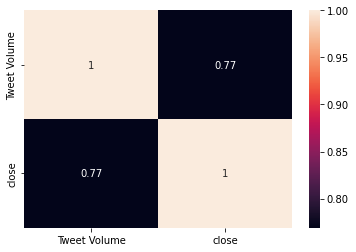

In [36]:
# Check correlation
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(filtered_t_volume.corr(), annot=True)
plt.show()

As there is not high correlation, twitter volume can be considered. (Usually, features with a correlation value of greater than `0.95` are dropped)